# Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import itertools
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Import Dataset

In [ ]:
# Load Dataset
df = pd.read_csv("stores_sales_forecasting.csv", encoding='latin1')

# Mengatur agar semua kolom terlihat
pd.set_option('display.max_columns', None)

# Menampilkan 5 data pertama dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


Deskripsi penjelasan masing-masing kolom:
- Order ID: ID unik untuk setiap pesanan
- Order Date: Tanggal pesanan dibuat
- Ship Date: Tanggal pesanan dikirimkan
- Ship Mode: Mode pengiriman yang digunakan
- Customer ID: ID unik untuk setiap pelanggan
- Customer Name: Nama pelanggan
- Segment: Segmen pelanggan berdasarkan kategori tertentu
- Country: Negara tempat pesanan dibuat
- City: Kota tempat pesanan dibuat
- State: Negara bagian tempat pesanan dibuat
- Postal Code: Kode pos tempat pesanan dibuat
- Region: Wilayah geografis tempat pesanan dibuat
- Product ID: ID unik untuk setiap produk
- Category: Kategori produk
- Sub-Category: Sub-kategori produk
- Product Name: Nama produk
- Sales: Nilai penjualan produk
- Quantity: Jumlah produk yang terjual
- Discount: Diskon yang diberikan pada produk
- Profit: Keuntungan yang diperoleh dari penjualan produk


In [ ]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [ ]:
# Melihat sebaran statistik dataset (kolom numerik)
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [ ]:
# Melihat sebaran statistik dataset (kolom object)
df.describe(include=['object'])

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121
unique,1764,889,960,4,707,707,3,1,371,48,4,375,1,4,380
top,US-2015-129007,9/5/2016,12/6/2017,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,California,West,FUR-FU-10004270,Furniture,Furnishings,KI Adjustable-Height Table
freq,4,10,10,1248,15,15,1113,2121,192,444,707,16,2121,957,18


In [ ]:
# Cek Missing Value
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# Cek data duplikat
df.duplicated().sum()

0

In [ ]:
# Menampilkan jumlah nilai unik pada setiap kolom dengan tipe data object
for column in df.select_dtypes(include='object').columns:
    unique_count = df[column].nunique()
    print(f'Jumlah nilai unik pada kolom {column}: {unique_count}')

Jumlah nilai unik pada kolom Order ID: 1764
Jumlah nilai unik pada kolom Order Date: 889
Jumlah nilai unik pada kolom Ship Date: 960
Jumlah nilai unik pada kolom Ship Mode: 4
Jumlah nilai unik pada kolom Customer ID: 707
Jumlah nilai unik pada kolom Customer Name: 707
Jumlah nilai unik pada kolom Segment: 3
Jumlah nilai unik pada kolom Country: 1
Jumlah nilai unik pada kolom City: 371
Jumlah nilai unik pada kolom State: 48
Jumlah nilai unik pada kolom Region: 4
Jumlah nilai unik pada kolom Product ID: 375
Jumlah nilai unik pada kolom Category: 1
Jumlah nilai unik pada kolom Sub-Category: 4
Jumlah nilai unik pada kolom Product Name: 380


# Data Preprocessing

## Memiliih kolom 'Order Data', 'Sales', 'Profit' untuk Analisa Selanjutnya

In [ ]:
# Membuat variabel baru df_final yang hanya berisi kolom Order Date, Sales, dan Profit
df_new = df[['Order Date', 'Sales', 'Profit']]

df_new.head()

,Order Date,Sales,Profit
0,11/8/2016,261.9600,41.9136
1,11/8/2016,731.9400,219.5820
2,10/11/2015,957.5775,-383.0310
3,6/9/2014,48.8600,14.1694
4,6/9/2014,1706.1840,85.3092


## Merubah tipe data kolom 'Order Date' dan menjadikannya sebagai index

In [ ]:
# Merubah tipe data kolom 'Order Data'
df_new['Order Date'] = pd.to_datetime(df_new['Order Date'])

# Menjadikan 'Order Date' sebagai index
df_new.set_index('Order Date', inplace=True)

# Melihat 5 data pertama
df_new.head()

<ipython-input-10-8e59e163e526>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Order Date'] = pd.to_datetime(df_new['Order Date'])


,Sales,Profit
Order Date,,
2016-11-08,261.9600,41.9136
2016-11-08,731.9400,219.5820
2015-10-11,957.5775,-383.0310
2014-06-09,48.8600,14.1694
2014-06-09,1706.1840,85.3092


## Membuat 'Sales' dan 'Profit' per bulan

In [ ]:
# Membuat variabel baru untuk perhitungan per bulan
df_new_monthly = df_new[['Sales','Profit']].resample('M').sum()

# Melihat 5 data pertama
df_new_monthly.head()

,Sales,Profit
Order Date,,
2014-01-31,6242.525,805.4665
2014-02-28,1839.658,120.6917
2014-03-31,14573.956,-1128.6550
2014-04-30,7944.837,554.3801
2014-05-31,6912.787,-349.8776


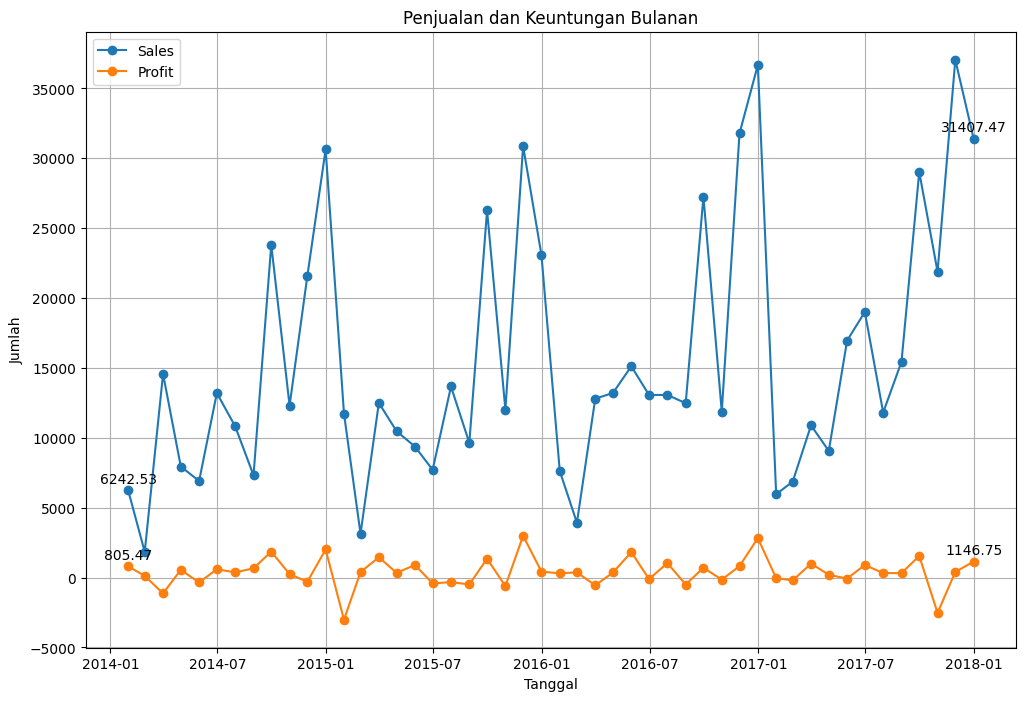

In [ ]:
# Plotting Sales dan Profit
plt.figure(figsize=(12, 8))
plt.plot(df_new_monthly.index, df_new_monthly['Sales'], marker='o', linestyle='-', label='Sales')
plt.plot(df_new_monthly.index, df_new_monthly['Profit'], marker='o', linestyle='-', label='Profit')

# Menambahkan nilai hanya pada titik awal dan titik akhir untuk Sales
plt.annotate(f'{df_new_monthly["Sales"].iloc[0]:.2f}',
             (df_new_monthly.index[0], df_new_monthly["Sales"].iloc[0]),
             textcoords="offset points",
             xytext=(0, 5),
             ha='center')

plt.annotate(f'{df_new_monthly["Sales"].iloc[-1]:.2f}',
             (df_new_monthly.index[-1], df_new_monthly["Sales"].iloc[-1]),
             textcoords="offset points",
             xytext=(0, 5),
             ha='center')

# Menambahkan nilai hanya pada titik awal dan titik akhir untuk Profit
plt.annotate(f'{df_new_monthly["Profit"].iloc[0]:.2f}',
             (df_new_monthly.index[0], df_new_monthly["Profit"].iloc[0]),
             textcoords="offset points",
             xytext=(0, 5),
             ha='center')

plt.annotate(f'{df_new_monthly["Profit"].iloc[-1]:.2f}',
             (df_new_monthly.index[-1], df_new_monthly["Profit"].iloc[-1]),
             textcoords="offset points",
             xytext=(0, 5),
             ha='center')

# Pengaturan plot
plt.title('Penjualan dan Keuntungan Bulanan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
plt.legend()
plt.grid(True)
plt.show()

## ADF Test
ADF (Augmented Dickey-Fuller) test adalah salah satu uji statistik yang digunakan untuk menguji keberadaan unit root dalam sebuah time series. Keberadaan unit root dalam data time series menunjukkan bahwa data tersebut tidak stasioner. Data time series yang tidak stasioner memiliki karakteristik yang berubah seiring waktu, seperti mean dan varians yang tidak konstan, serta autokorelasi yang tidak stabil.

Berikut adalah beberapa poin penting tentang ADF test:

- Stasioneritas: Data time series dikatakan stasioner jika statistiknya (seperti mean, varians, dan autokorelasi) tidak berubah seiring waktu. Data yang tidak stasioner biasanya menunjukkan pola trend atau pola musiman.

- Unit Root: Keberadaan unit root dalam data time series adalah indikator bahwa data tersebut tidak stasioner. Unit root menunjukkan bahwa shock atau perubahan dalam data akan memiliki efek yang persisten dan tidak hilang seiring waktu.

- ADF Test: ADF test adalah versi yang diperluas dari Dickey-Fuller test yang mempertimbangkan kemungkinan adanya korelasi serial dalam residual dengan menambahkan lag dari perbedaan variabel yang di-uji.

Hipotesis:

- Hipotesis Nol (H0): Data memiliki unit root (data tidak stasioner).
- Hipotesis Alternatif (H1): Data tidak memiliki unit root (data stasioner).

Interpretasi:

Jika nilai p-value dari ADF test lebih kecil dari level signifikansi tertentu (misalnya 0.05), kita menolak hipotesis nol dan menyimpulkan bahwa data adalah stasioner. Jika p-value lebih besar dari level signifikansi, kita gagal menolak hipotesis nol dan menyimpulkan bahwa data mungkin memiliki unit root (tidak stasioner).

In [ ]:
# Menjalankan ADF test pada kolom 'Sales'
result = adfuller(df_new_monthly['Sales'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.699026242828901
p-value: 8.450793985809693e-05


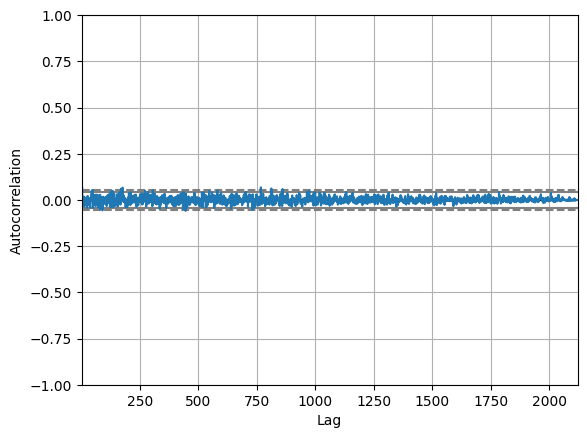

In [ ]:
# Menggunakan df awal untuk plot
autocorrelation_plot(df['Sales'])
plt.show()

Hasil uji ADF menunjukkan statistik -4.697056 dan p-value 0.0000845 yang menyimpulkan adanya bukti kuat melawan hipotesis nol (H0), yang mengarah pada penolakan hipotesis nol tersebut. Ini menunjukkan bahwa data tidak memiliki unit root dan bersifat stasioner, yang berarti data tidak menunjukkan tren dan sifat statistiknya tetap konstan dari waktu ke waktu.

## ACF & PACF

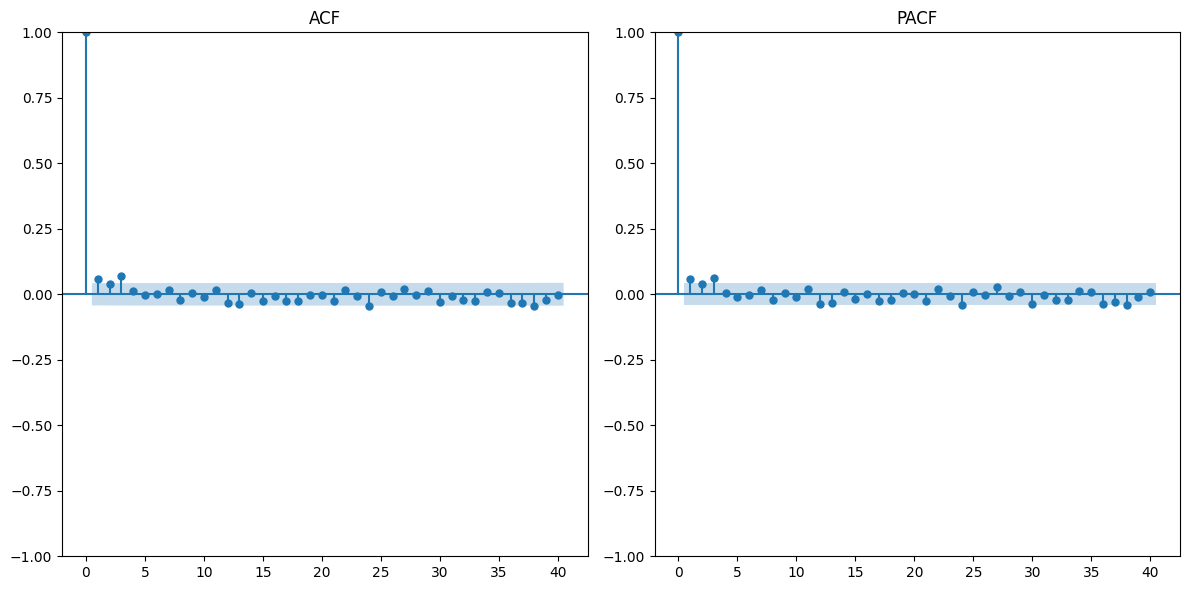

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Misalkan df_new_monthly adalah DataFrame yang sudah disiapkan sebelumnya

# Menjalankan ADF test untuk memastikan data stasioner
result = adfuller(df['Sales'])
if result[1] > 0.05:
    print("Data tidak stasioner. Pertimbangkan untuk melakukan differencing.")

# Plot ACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(df['Sales'], lags=40, ax=plt.gca())
plt.title('ACF')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(df['Sales'], lags=40, ax=plt.gca())
plt.title('PACF')

plt.tight_layout()
plt.show()

# Splitting Data

In [ ]:
# Menentukan variabel target (misalnya, 'Sales')
X = df_new_monthly.index.values.reshape(-1, 1)  # Fitur (tanggal)
y = df_new_monthly['Sales'].values  # Target (Sales)

# Membagi data menjadi set pelatihan dan pengujian (misalnya, 80% pelatihan dan 20% pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build Model

## ARIMA

In [ ]:
# Membuat model ARIMA
order = (5, 1, 1)  # p, d, q adalah parameter ARIMA, Anda bisa tentukan atau gunakan grid search untuk optimalisasi
model_arima = ARIMA(df_new_monthly['Sales'], order=order)
model_arima_fit = model_arima.fit()

In [ ]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -492.765
Date:                Fri, 09 Aug 2024   AIC                            999.530
Time:                        10:22:33   BIC                           1012.481
Sample:                    01-31-2014   HQIC                          1004.404
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9902      0.846     -1.170      0.242      -2.648       0.668
ar.L2         -0.5970      0.529     -1.128      0.259      -1.634       0.440
ar.L3         -0.3067      0.442     -0.693      0.488      -1.173       0.560
ar.L4         -0.2831      0.342     -0.827      0.408      -0.954       0.388
ar.L5         -0.3227      0.247     -1.307      0.191      -0.806       0.161
ma.L1          0.4910      0.882      0.557      0.578      -1.238       2.220
sigma2      8.151e+07    6.1e-09   1.34e+16      0.000    8.15e+07    8.15e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.84   Prob(JB):                         0.93
Heteroskedasticity (H):               2.17   Skew:                             0.01
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.9e+33. Standard errors may be unstable.
"""

In [ ]:
# Prediksi
arima_forecast = model_arima_fit.forecast(steps=len(X_test))  # memprediksi sebanyak X_test
print(arima_forecast)

2018-01-31    25446.116280
2018-02-28    27707.624234
2018-03-31    28769.994923
2018-04-30    24899.469888
2018-05-31    30914.512665
2018-06-30    28226.960588
2018-07-31    27453.323685
2018-08-31    28732.301245
2018-09-30    28298.069500
2018-10-31    27021.635918
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
# Menghitung error
mse_arima = mean_squared_error(df_new_monthly['Sales'][-len(X_test):], arima_forecast)
print(f'MSE ARIMA: {mse_arima}')

MSE ARIMA: 140718144.78747398


## SARIMAX

In [ ]:
# Membuat model SARIMA
order = (1, 1, 1)  # parameter ARIMA
seasonal_order = (1, 1, 1, 12)  # parameter musiman: P, D, Q, dan periode musim (s)
model_sarima = SARIMAX(df_new_monthly['Sales'], order=order, seasonal_order=seasonal_order)
model_sarima_fit = model_sarima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
model_sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -348.952
Date:                            Fri, 09 Aug 2024   AIC                            707.904
Time:                                    10:22:34   BIC                            715.681
Sample:                                01-31-2014   HQIC                           710.589
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4363      0.172      2.529      0.011       0.098       0.774
ma.L1         -0.8722      0.143     -6.116      0.000      -1.152      -0.593
ar.S.L12      -0.9439      0.413     -2.284      0.022      -1.754      -0.134
ma.S.L12       0.8142      0.764      1.066      0.287      -0.683       2.312
sigma2      2.809e+07   5.45e-08   5.15e+14      0.000    2.81e+07    2.81e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.20   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.14   Prob(JB):                         0.71
Heteroskedasticity (H):               0.58   Skew:                             0.17
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.28e+30. Standard errors may be unstable.
"""

In [ ]:
# Prediksi
sarima_forecast = model_sarima_fit.forecast(steps=len(X_test))  # memprediksi sebanyak X_test
print(sarima_forecast)

2018-01-31     7852.173330
2018-02-28     9089.745368
2018-03-31    15718.070378
2018-04-30    13378.114100
2018-05-31    20660.933171
2018-06-30    23641.800455
2018-07-31    15514.504186
2018-08-31    18637.752890
2018-09-30    33895.481815
2018-10-31    24413.580300
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
# Menghitung error
mse_sarima = mean_squared_error(df_new_monthly['Sales'][-len(X_test):], sarima_forecast)
print(f'MSE ARIMA: {mse_sarima}')

MSE ARIMA: 44007931.91351273


## Perbandingan hasil forecasting

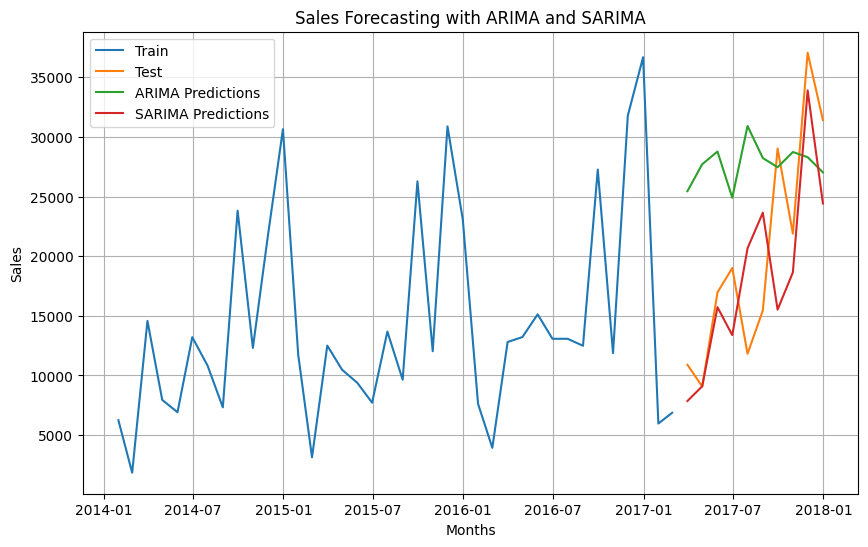

In [ ]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, label='Train')
plt.plot(X_test, y_test, label='Test')
plt.plot(X_test, arima_forecast, label='ARIMA Predictions')
plt.plot(X_test, sarima_forecast, label='SARIMA Predictions')
plt.title('Sales Forecasting with ARIMA and SARIMA')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()